# XGBoost with Boston Dataset
  
  
  
  
  
  
#### Jeevan Kumar Ramakrishna

## Import Code

In [18]:
import sklearn.datasets as sk_data
import sklearn.ensemble as sk_ens
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
# sns.set_context("paper")

from pdpbox import info_plots, get_dataset
from pdpbox import pdp
import xgboost as xgb
import sklearn.metrics as sk_met
import sklearn.model_selection as sk_mod

sns.set(style="ticks", color_codes=True)
# sns.set_context('talk')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format


In [3]:


from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



## Load Boston dataset

In [4]:
boston = sk_data.load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:

data = pd.DataFrame(boston['data'])
data.columns = boston.feature_names
data['target'] = boston['target']
display(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


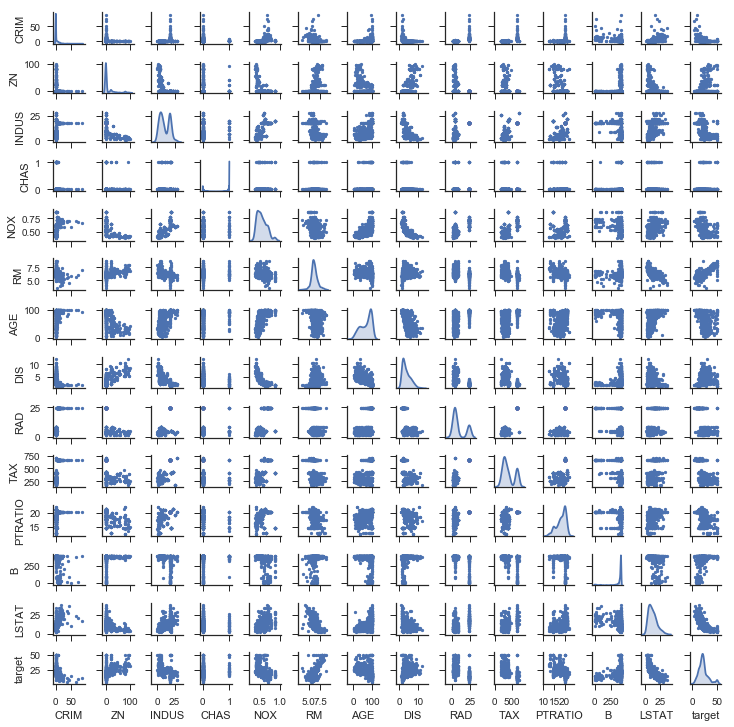

In [81]:
g = sns.pairplot(data, size=1, diag_kind="kde", 
                 diag_kws=dict(shade=True),
                 plot_kws=dict(s=5, edgecolor="b", linewidth=1))
plt.gcf().set_size_inches(10,10)

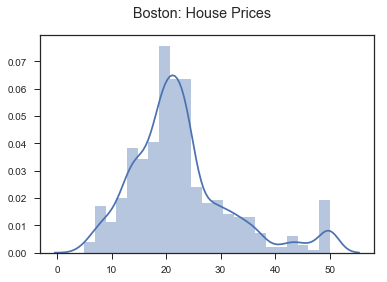

In [11]:
sns.distplot(boston['target'])
t = plt.gcf().suptitle('Boston: House Prices')

## Modelling

### Datasetup

In [12]:
train, test = sk_mod.train_test_split(data, train_size=0.8, random_state=0)

In [13]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1:]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


### Sklearn Gradient Boosted Tree Fit

In [19]:
params = {
    'learning_rate': 0.1,
    'loss':'ls',
    'n_estimators':200,
    'subsample':1.0,
    'criterion':'friedman_mse',
    'max_depth':5,
    'random_state':0
    
}
gb_regr = sk_ens.GradientBoostingRegressor(**params)

In [20]:
gb_regr.fit(X=X_train, y=y_train)
y_preds = gb_regr.predict(X_test)
print('Mean Squared Error {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Mean Squared Error 17.3264


### Sklearn Gradient Boosted Tree Grid Search based Fit

In [21]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.025, 0.05, 0.1, 0.15],
    'subsample': [1.0]
}
gs_cv_sk_reg = sk_mod.GridSearchCV(cv=5, 
                            estimator=gb_regr, 
                            n_jobs=5, verbose=1, 
                            scoring=sk_met.make_scorer(sk_met.mean_squared_error, greater_is_better=False),
                            param_grid=param_grid)
gs_cv_sk_reg.fit(X=X_train, y=y_train)
gs_cv_sk_reg.best_estimator_.fit(X=X_train, y=y_train)
y_preds = gs_cv_sk_reg.best_estimator_.predict(X_test)
print('Mean Squared Error {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Mean Squared Error 16.9598


[Parallel(n_jobs=5)]: Done 240 out of 240 | elapsed:    5.0s finished


In [22]:
gs_cv_sk_reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

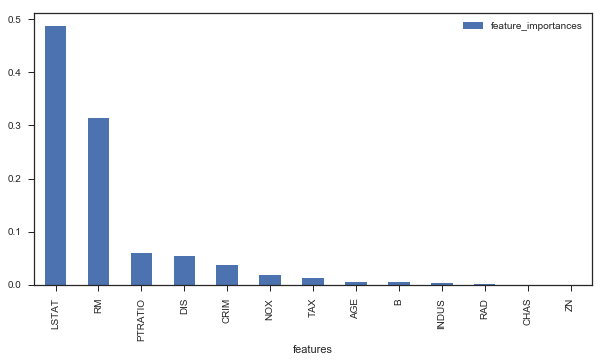

In [23]:
model = gs_cv_sk_reg.best_estimator_
fig, ax = plt.subplots(1, 1)
plot_df = pd.DataFrame({'feature_importances':model.feature_importances_, 'features':data.columns[:-1] })
plot_df = plot_df.set_index('features')
plot_df.sort_values(by=['feature_importances'], ascending=False, inplace=True)
plot_df.plot(kind='bar', ax=ax)
fig.set_size_inches(10,5)


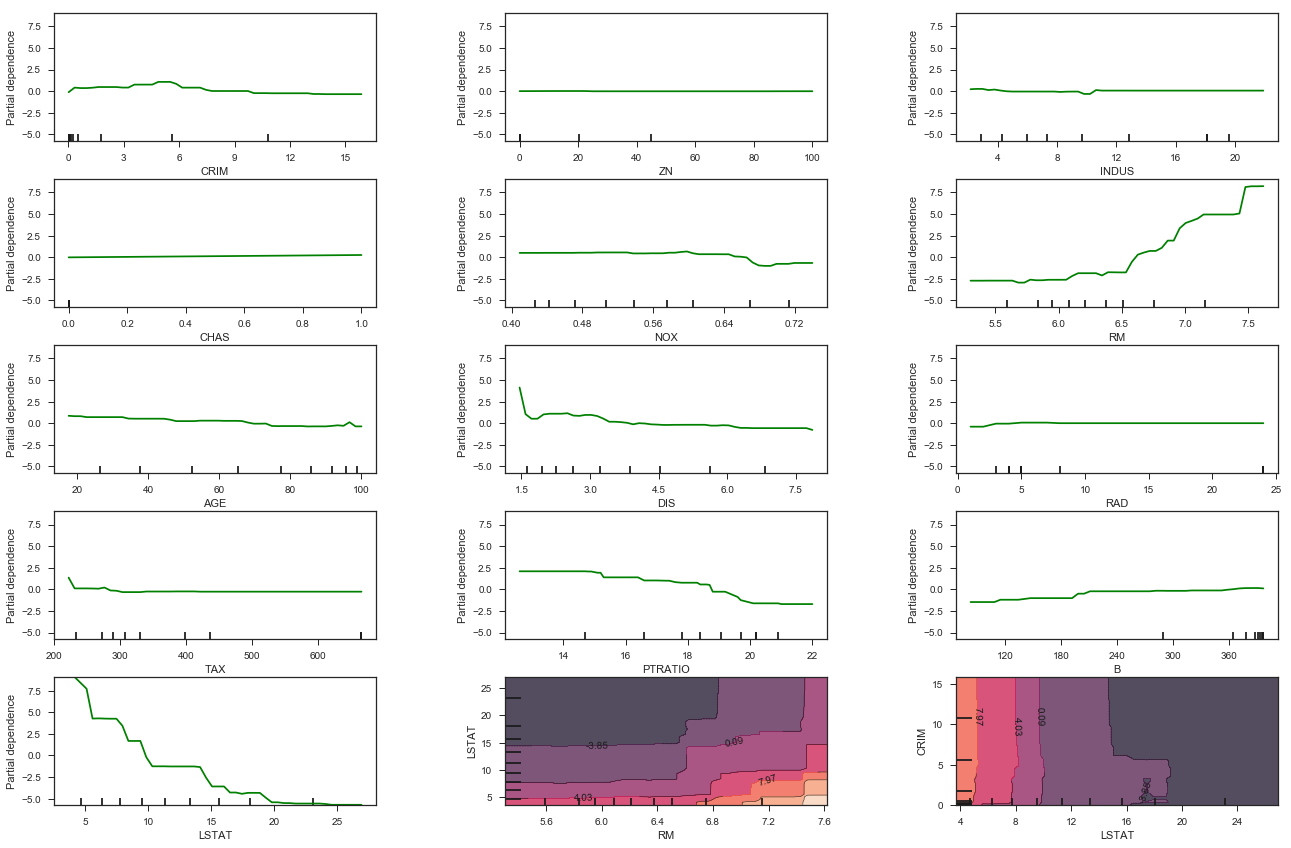

In [24]:
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, (5, 12), (12,0)]
fig, axs = sk_ens.partial_dependence.plot_partial_dependence(model, data[data.columns[:-1]].values, 
                                   features,
                                   feature_names=data.columns[:-1],
                                   n_jobs=3, grid_resolution=50)
fig.set_size_inches(20, 20)

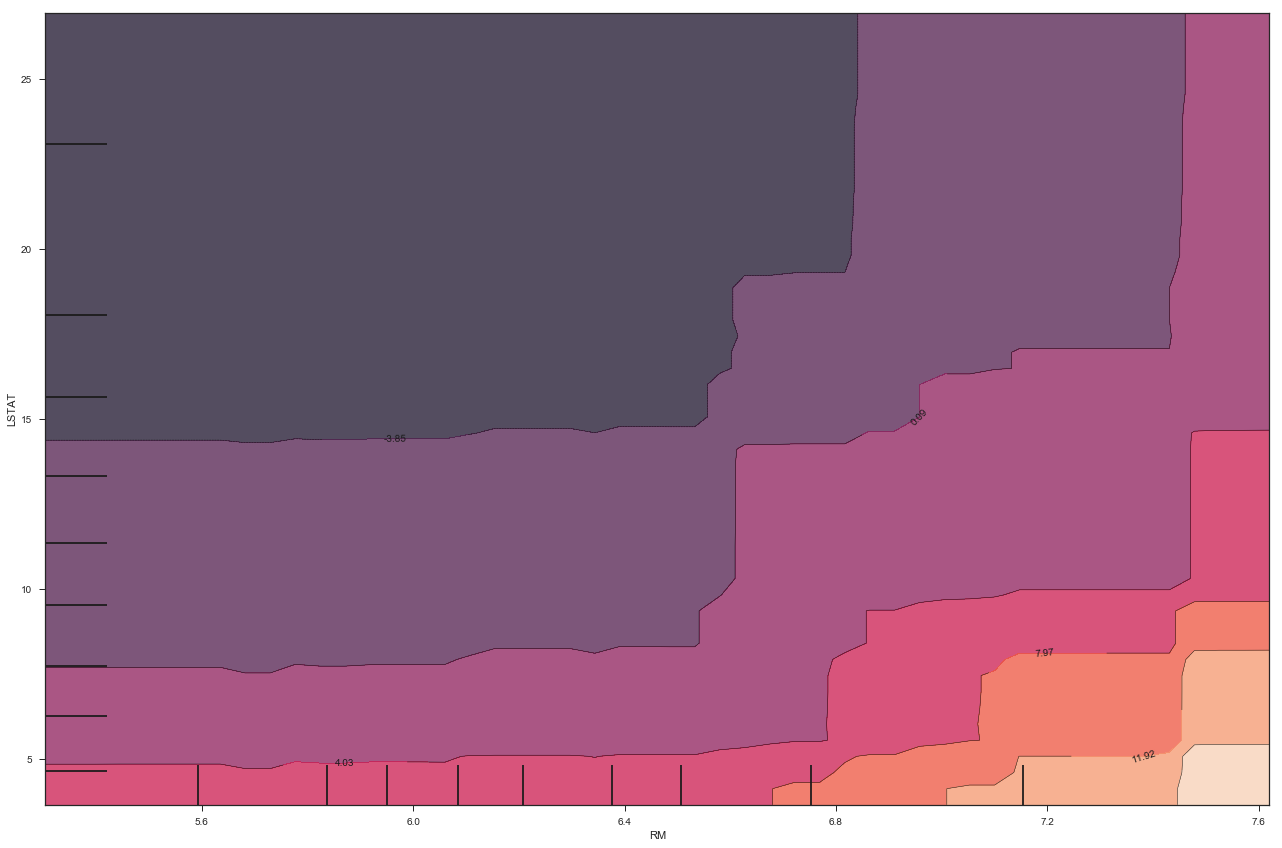

In [25]:
features = [(5, 12)]
fig, axs = sk_ens.partial_dependence.plot_partial_dependence(model, data[data.columns[:-1]].values, 
                                   features,
                                   feature_names=data.columns[:-1],
                                   n_jobs=3, grid_resolution=50)
fig.set_size_inches(20, 20)

In [26]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

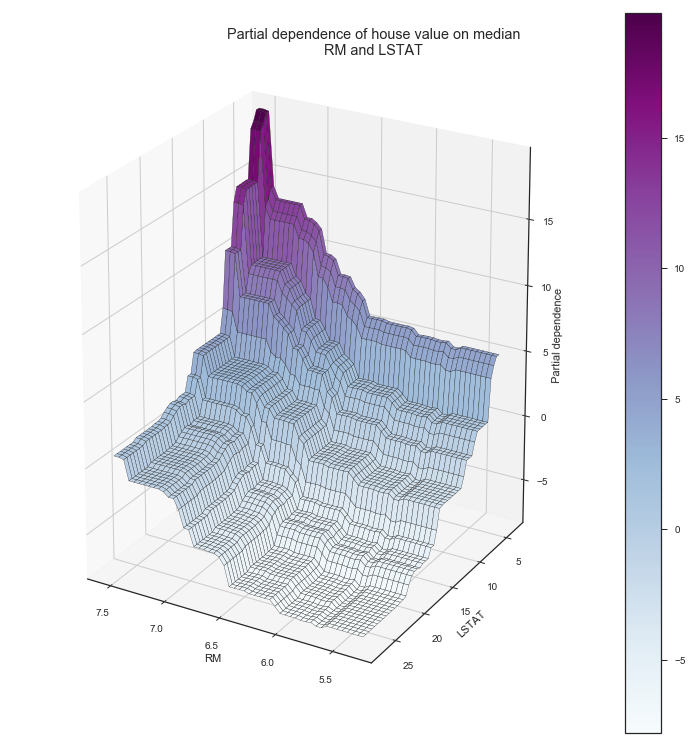

In [27]:
fig = plt.figure()

target_feature = (5, 12)
names = data.columns
pdp, axes = sk_ens.partial_dependence.partial_dependence(model, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=20, azim=120)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
             '{0} and {1}'.format(names[target_feature[0]], names[target_feature[1]]))
plt.subplots_adjust(top=0.9)
plt.gcf().set_size_inches(10, 10)

## Data Transformed

In [29]:
data_trans = data.copy()

In [30]:
data_trans.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [33]:
data_trans.shape

(506, 14)

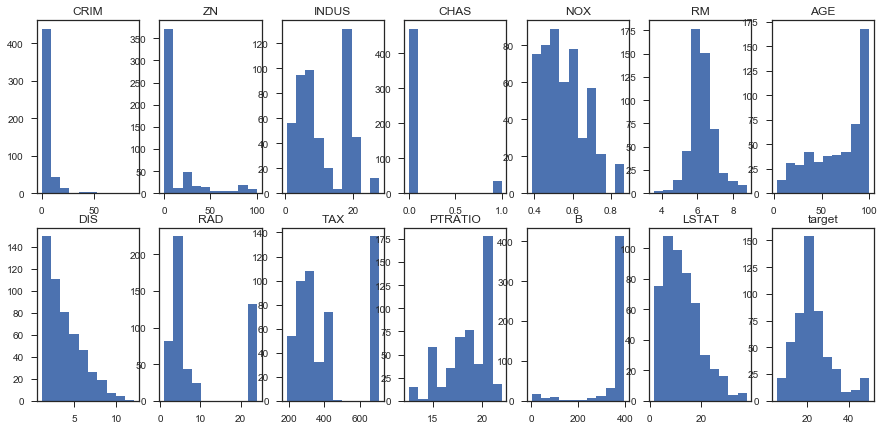

In [38]:
fig, ax = plt.subplots(2, 7)
i, j = 0, 0
for col in data_trans.columns:
    ax[i][j].hist(data_trans[col])
    ax[i][j].set_title(col)
    j += 1
    if j == 7:
        j = 0
        i += 1
fig.set_size_inches(15, 7)

In [39]:
import sklearn.preprocessing as sk_pre


In [66]:
ss = sk_pre.QuantileTransformer()

In [67]:
ss_fit = ss.fit(X_train)
X_train_trans = ss.transform(X_train)

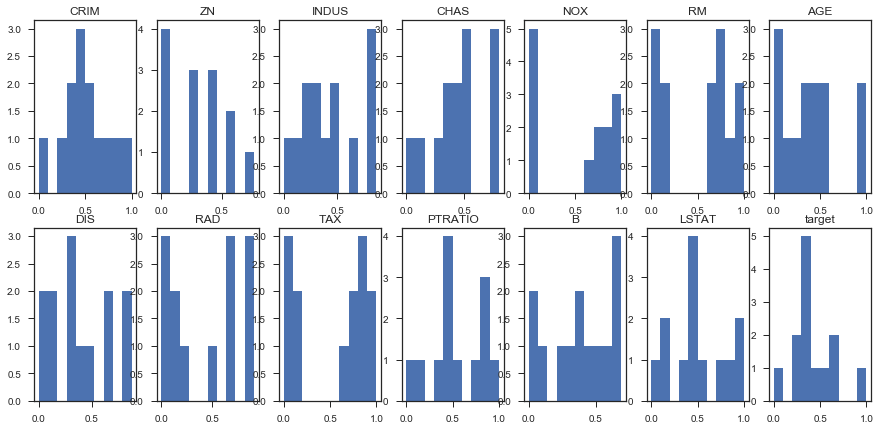

In [68]:
fig, ax = plt.subplots(2, 7)
i, j = 0, 0
for k, col in enumerate(data_trans.columns):
    ax[i][j].hist( X_train_trans[k])
    ax[i][j].set_title(col)
    j += 1
    if j == 7:
        j = 0
        i += 1
fig.set_size_inches(15, 7)

In [69]:
X_train_trans.shape

(404, 13)

In [70]:
params = {
    'learning_rate': 0.1,
    'loss':'ls',
    'n_estimators':200,
    'subsample':1.0,
    'criterion':'friedman_mse',
    'max_depth':5,
    'random_state':0
    
}
sk_gb_regr = sk_ens.GradientBoostingRegressor(**params)
sk_gb_regr.fit(X_train_trans, y_train)

X_test_trans = ss.transform(X_test)

y_preds = sk_gb_regr.predict(X_test_trans)
sk_met.mean_squared_error(y_preds, y_test)


17.933242215764203

In [71]:
param_grid = {
    'n_estimators': [10, 100, 200, 300],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.025, 0.05, 0.1, 0.15],
    'subsample': [1.0]
}
gs_cv_sk_reg = sk_mod.GridSearchCV(cv=5, 
                            estimator=gb_regr, 
                            n_jobs=5, verbose=1, 
                            scoring=sk_met.make_scorer(sk_met.mean_squared_error, greater_is_better=False),
                            param_grid=param_grid)
gs_cv_sk_reg.fit(X=X_train_trans, y=y_train)
gs_cv_sk_reg.best_estimator_.fit(X=X_train_trans, y=y_train)
y_preds = gs_cv_sk_reg.best_estimator_.predict(X_test_trans)
print('Mean Squared Error {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  48 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 320 out of 320 | elapsed:    9.4s finished


Mean Squared Error 16.2651


In [72]:
gs_cv_sk_reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)